# Linear Advection Equation in 1D

Here we explore numerical solutions to the 1D linear advection equation

\begin{align}
  \frac{\partial u}{\partial t} + c\frac{\partial u}{\partial x} = 0
\end{align}

where $u = u(x,t)$ and $c$ is a constant. Analytical solutions to this equation take the form $f(x - ct)$, which propagate in the positive $x$ direction and maintain their shape.

To solve numerically, we use finite differences. First, discretize the independent variables: $x\rightarrow x_{i}$, $t\rightarrow t_{n}$. Next, discretize the dependent variables (or grid functions): $u(x,t)\rightarrow u(x_{i},t_{n})\rightarrow u^{n}_{i}$. Finally, discretize derivatives according to some chosen finite difference scheme. Here we choose to use forward differencing for time derivatives and backward differencing for spatial derivatives:

\begin{align}
  &\frac{\partial u}{\partial t} \rightarrow \frac{u^{n+1}_{i} - u^{n}_{i}}{\Delta{t}}
  \\
  &\frac{\partial u}{\partial x} \rightarrow \frac{u^{n}_{i} - u^{n}_{i-1}}{\Delta{x}}
\end{align}

where $\Delta{t}$ and $\Delta{x}$ are the discrete time stepsize and grid spacing, respectively. The above scheme leads to the discretized version of the linear advection equation

\begin{align}
  u^{n+1}_{i} = u^{n}_{i} - \frac{c\Delta{t}}{\Delta{x}}\left(u^{n}_{i} - u^{n}_{i-1}\right)
\end{align}

Much is being glossed over here for the sake of brevity. If you are interested in the details, see Lorena Barba's video lectures or any textbook on numerical analysis.

In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [21]:
# wave speed
c = 1.0
print('wave speed is',c)

# setup spatial grid (vertex-centered)
L = 2.0         # size of physical grid
nx = 61         # total number of grid points
dx = L/(nx-1)   # grid spacing
x = np.linspace(0, L, nx)
print('grid spacing is',dx)

# setup time grid
dt = 0.025      # size of timesteps
nt = 20  # total number of timesteps
print('time stepsize is',dt)

# stability diagnostics
s = c*dt/dx   # Courant number
print('Courant number is',s)

wave speed is 1.0
grid spacing is 0.03333333333333333
time stepsize is 0.025
Courant number is 0.75


In [22]:
# initialize grid functions
u = np.zeros(nx) # grid function at the current step
un = np.ones(nx) # grid function at the previous step

# initial data
a = int(0.25*L/dx)
b = int(0.5*L/dx);
u[:a] = 1.
u[a:b] = 2. 
u[b:] = 1.
umax0 = np.amax(u)
print(u)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [23]:
# plot initial configuration
plt.plot(x, u)
plt.ylim(0, 1.15*umax0)
plt.xlim(0, L)
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.show()

In [24]:
### added for 3d wireframe plots ###
# initialize output arrays
pstep = 1   # number of time steps between printing
nout = 1 + nt//pstep # number of snapshots that will be printed
tdata = np.zeros(nout)                    # initialize time step output array
xdata = np.linspace(0, L, nx)              # initialize xgrid output array
udata = np.zeros((len(tdata),len(xdata))) # initialize grid function output array
# print initial data to output arrays
tdata[0] = 0.
udata[0,:] = u[:]
# reset print counter
iprint=1

<IPython.core.display.Javascript object>


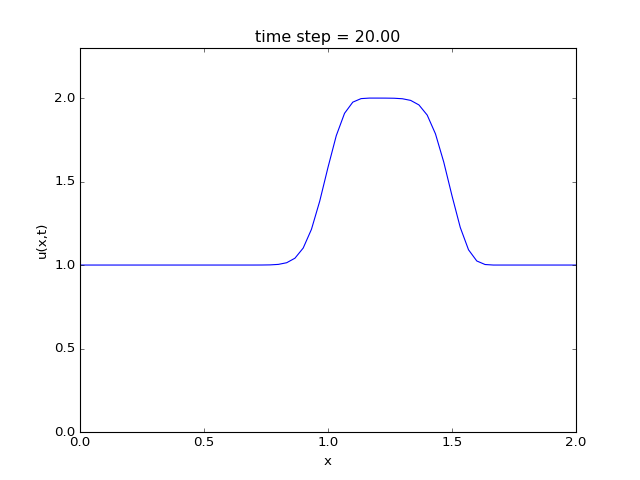

In [25]:
# function to update plot at each time step
def replot(n, x, u, ax):
    ax.cla()
    ax.set_ylim(0, 1.15*umax0)
    ax.set_xlim(0, L)
    ax.set_xlabel('x')
    ax.set_ylabel('u(x,t)')
    ax.set_title('time step = %.2f' % n)
    ax.plot(x,u)
    fig.canvas.draw()
    #time.sleep(0.01)

# create figure
fig = plt.figure()
ax = fig.add_subplot(111)

#plot initial configuration
replot(0, x, u, ax)

# solve
for n in range(1,nt+1):
    un = u.copy()
    for i in range (1,nx):
        # evolve solution using forward-time backward-space (FTBS) scheme
        u[i] = un[i] - s*(un[i] - un[i-1])

    # update plot
    replot(n, x, u, ax)

    # save output
    if (n % pstep == 0):
        # print time step
        tdata[iprint] = n*dt
        # print grid functions
        udata[iprint,:] = u[:] 
        # increment print counter
        iprint = iprint + 1

In [20]:
# plot final configuration
plt.plot(x,u)
plt.ylim(0, 1.15*umax0)
plt.xlim(0, L)
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.show()

<IPython.core.display.Javascript object>


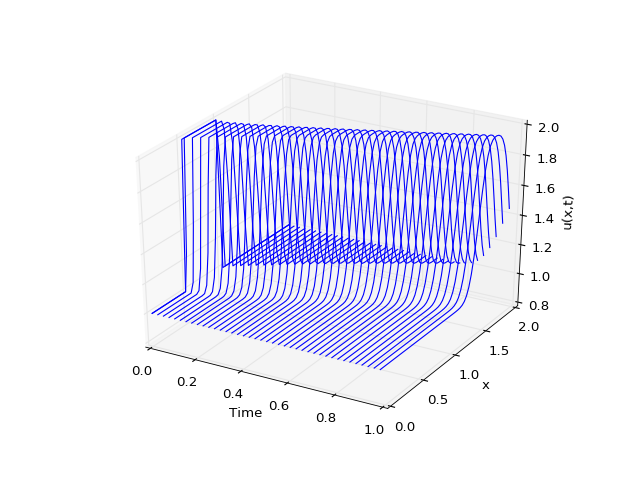

In [21]:
# 3d wireframe plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
XX, TT = np.meshgrid(xdata, tdata)
ax.plot_wireframe(TT, XX, udata, rstride=1, cstride=0)
ax.set_xlabel('Time')
ax.set_ylabel('x')
ax.set_zlabel('u(x,t)')
plt.show()

## Explorations

E1. What happens to the solution if you continue to **increase** the spatial resolution while holding the time stepsize fixed? (Alternatively, try decreasing the time stepsize while holding the spatial resolution fixed.) Why does this happen?

E2. What happens to the solution if you continue to **decrease** the spatial resolution while holding the tiem stepsize fixed? (Alternatively, try increasing the time stepsize while holding the spatial resolution fixed.) Why does this happen?

E3. What happens to the solution if you change the sign in the advection equation from negative to positive? In other words, use the same scheme above (forwad differencing in time, backward differencing in space) to solve the equation $\partial_{x}u - c\partial_{t}u = 0$ instead of $\partial_{x}u + c\partial_{t}u = 0$. What happens to the analytical solution? What happens to the numerical solution?